<a href="https://colab.research.google.com/github/Justabhi96/face_recognition_system/blob/master/face_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install face_recognition

In [0]:
import cv2
import face_recognition as fr
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [0]:
class face_recognition_system:
  def __init__(self, pickle_file_name = "face_encodings.pickle"):
    self.pickle_file_name = pickle_file_name
    if os.path.exists(pickle_file_name):
      if os.path.getsize(pickle_file_name) > 0:
        with open(pickle_file_name, "rb") as face_encodings_pickle:
          self.known_face_data = pickle.load(face_encodings_pickle)
          self.known_face_encodings = [i[0] for i in self.known_face_data]
          self.known_face_names = [i[1] for i in self.known_face_data]
      else:
        self.known_face_data = []
        self.known_face_encodings, self.known_face_names = [],[]
    else:
      self.known_face_data = []
      self.known_face_encodings, self.known_face_names = [],[]
      with open("face_encodings.pickle", "wb") as face_encodings_pickle:
        pickle.dump([], face_encodings_pickle)
  
  def save_in_pickle(self, encoding_data):
    """Takes the encoding of new image, adds it in already known encodings and saves it in a pickle"""
    
    self.known_face_data.append(encoding_data)
    with open(self.pickle_file_name, "wb") as known_face_pickle:
      pickle.dump(self.known_face_data, known_face_pickle)
    
  def add_face(self, image_path, emp_name):
    """Adds a new employee face encoding to the known face encodings"""
    
    image_enc = fr.face_encodings(fr.load_image_file(image_path))[0]
    self.save_in_pickle([image_enc, emp_name])
    self.__init__(self.pickle_file_name)
    
  def recognize(self, image_path):
    """Matches the given face with the known face encodings and returns the employee name"""
    
    image = fr.load_image_file(image_path)
    face_locations = fr.face_locations(image, model = "cnn")
    images_encoding = fr.face_encodings(image, face_locations)
    
    for i in range(len(images_encoding)):
      top, right, bottom, left = face_locations[i]
      compare_results = fr.compare_faces(self.known_face_encodings, images_encoding[i], 0.5)
      if True in compare_results:
        index = compare_results.index(True)
        emp_name = self.known_face_names[index]
      else:
        emp_name = "Unknown"
      cv2.rectangle(image, (left, top), (right, bottom), color = (0, 0, 255), thickness = 5)
      cv2.putText(image, emp_name, (left, bottom+30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), thickness = 2)
    cv2_imshow(image)
    
  def detect_in_video(self, video_path):
    video = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))
    process_frame = True
    while True:
      is_feed, frame = video.read()
      if is_feed:
        emp_names = []
        if process_frame:
          small_frame = cv2.resize(frame, (0,0), fx = 0.25, fy = 0.25)
          rgb_small_frame = small_frame[:,:,::-1]

          face_locations = fr.face_locations(rgb_small_frame, model = "cnn")
          images_encoding = fr.face_encodings(rgb_small_frame, face_locations)

          for i in range(len(images_encoding)):
            top, right, bottom, left = face_locations[i]
            compare_results = fr.compare_faces(self.known_face_encodings, images_encoding[i], 0.5)
            if True in compare_results:
              index = compare_results.index(True)
              emp_name = self.known_face_names[index]
            else:
              emp_name = "Unknown"
            emp_names.append(emp_name)

        process_frame = not process_frame

        for (top, right, bottom, left), name in zip(face_locations, emp_names):
          top, right, bottom, left = [i*4 for i in (top, right, bottom, left)]

          # Draw a box around the face
          cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

          # Draw a label with a name below the face
          cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
          font = cv2.FONT_HERSHEY_DUPLEX
          cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

        out.write(frame)
      else:
        out.release()
        break

In [0]:
recognition_system = face_recognition_system()

In [0]:
recognition_system.add_face("paul.jpg", "Paul")

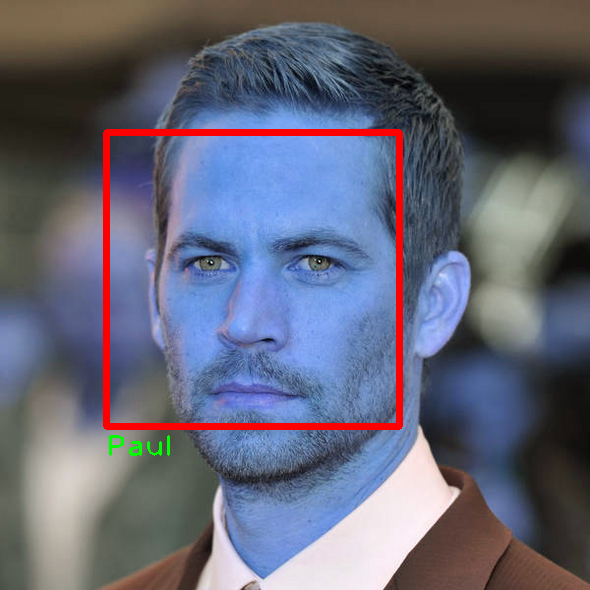

In [6]:
recognition_system.recognize("paul1.jpg")